
Medical Cost Prediction

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from Kaggle. The dataset contains 1338 observations and 7 variables. 


In [74]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [75]:
#load data
df =pd.read_csv(r"C:\Users\HP\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data Preprocessing

In [77]:
df.shape

(1338, 7)

In [78]:
print("Number of rows:",df.shape[0])

Number of rows: 1338


In [79]:
print("Number of columns:",df.shape[1])

Number of columns: 7


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [81]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [82]:
#checking descriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [83]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [84]:
print(df.sex.value_counts(),'\n',df.region.value_counts(),'\n',df.smoker.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64




Replacing the categorical variables with numerical values.

    sex : 1 - male, 0 - female
    smoker : 1 - yes, 0 - no
    region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest



In [86]:
#changing categorical values to numerical values
df['sex'] =df['sex'].map({'male':1,'female':0})
df['smoker'] =df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})
                        

In [87]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Exploratory Data Analysis

Viswalization of the data is a good way to understand the data. In this session ,I will plot the distribution of each variable to get an overview about their counts and distributions

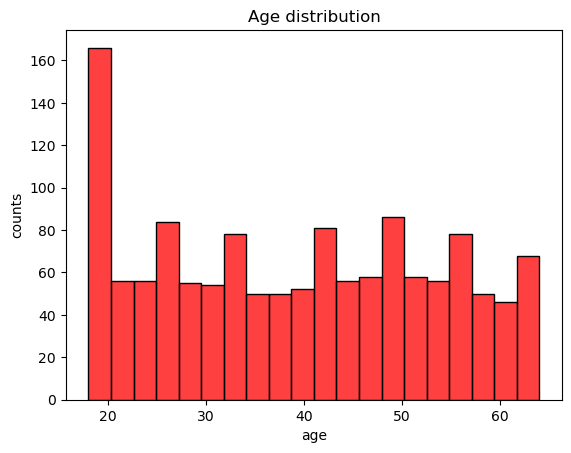

In [90]:
#age distribution
sns.histplot(df['age'],bins=20,kde =False,color='red')
plt.title("Age distribution")
plt.xlabel('age')
plt.ylabel('counts')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

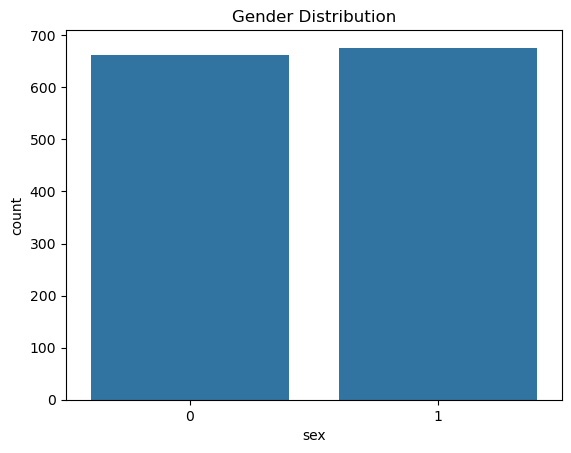

In [91]:
#gender plot
sns.countplot(x='sex',data=df)
plt.title("Gender Distribution")


It's clear that number of males and females are almost equal in the dataset

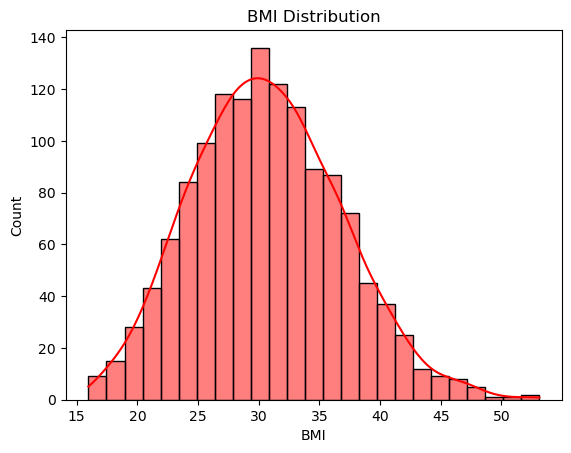

In [93]:
#bmi distribution
sns.histplot(df['bmi'],kde=True,color ='red')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

A healthy body mass index (BMI) for adults is between 18.5 and 24.9. This is considered the "normal weight" range. 
BMI categories 

    Underweight: BMI is below 18.5
    Healthy weight: BMI is between 18.5 and 24.9
    Overweight: BMI is between 25.0 and 29.9
    Obesity: BMI is 30.0 or greater
    Severe obesity: BMI is 40 or greater

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost

In [95]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

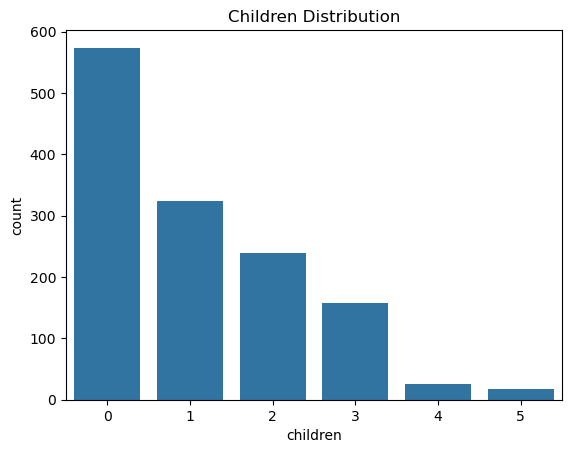

In [96]:
#child Distribution
sns.countplot(x ='children',data=df)
plt.xlabel('children')
plt.ylabel('count')
plt.title('Children Distribution')
plt.show()

This graph clearly shows most of the parents have no children and very few patients have more than 3 children

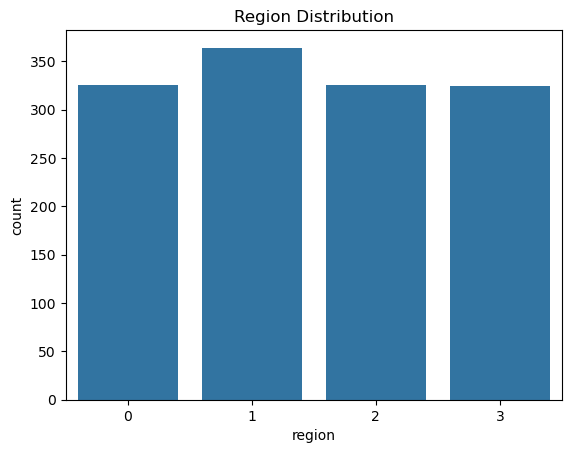

In [98]:
#region wise plot
sns.countplot(x ='region',data=df)
plt.xlabel('region')
plt.ylabel('count')
plt.title('Region Distribution')
plt.show()

The count of the patient from northwest is slightly higher than other regions,but the number of patients from other regions are almost equal.

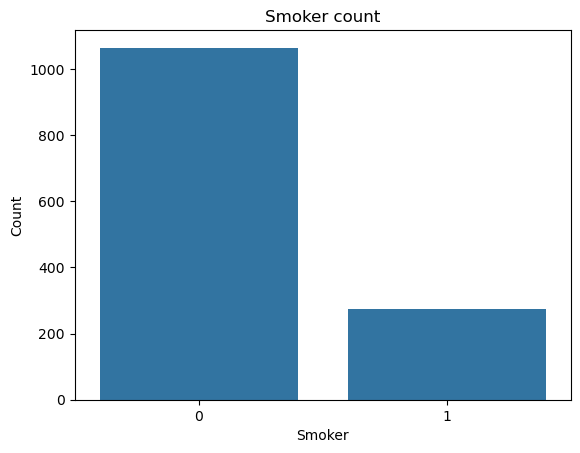

In [119]:
#count of smokers
sns.countplot(x='smoker',data=df)
plt.title("Smoker count")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

smokers are very few in the dataset.Nearly 80% of the patients are non-smokers


<Axes: xlabel='smoker', ylabel='count'>

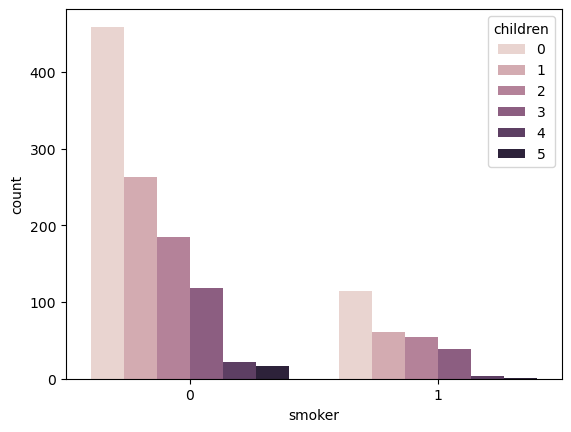

In [139]:
#smoker count with respect to the children count
sns.countplot(x =df.smoker,hue =df.children)

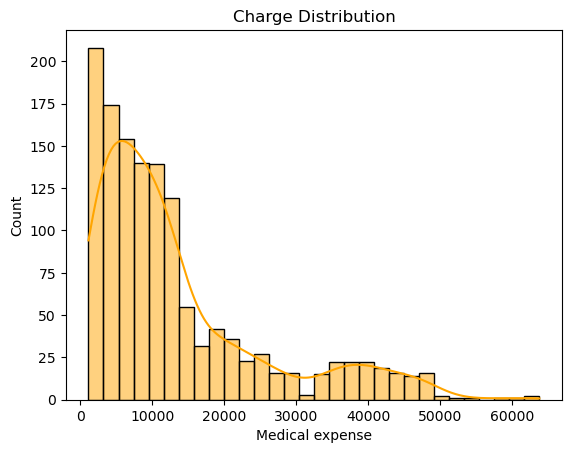

In [147]:
#charges Distribution
sns.histplot(df['charges'],kde =True,color ='orange')
plt.title("Charge Distribution")
plt.xlabel("Medical expense")
plt.ylabel("Count")
plt.show()

In [143]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Most of the medical expenses are below 20000, with negligible number of petients having medical expenses above 50000.

From all the above plots, we have a clear understanding about the count of patients under each category of the variables. Now I will look into the correlation between variables.

Correlation

In [154]:
#correlation
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


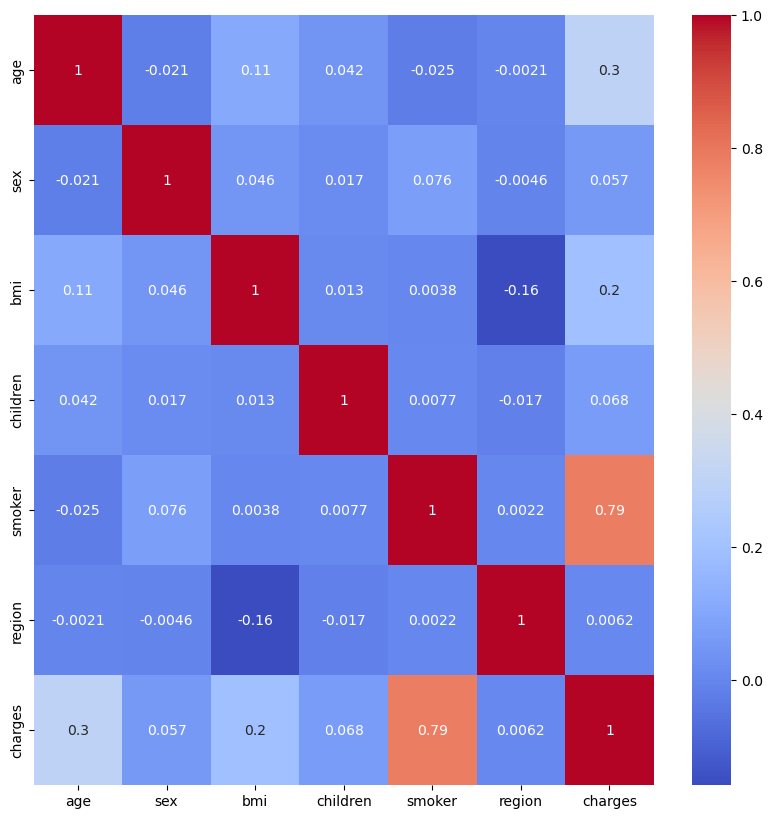

In [156]:
#plotting the correlation heatmap
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant correlation with the medical expenses .Now i will explore more into patients smoking habits and their relation with other factor.

Plotting the smoker count with patient's gender.

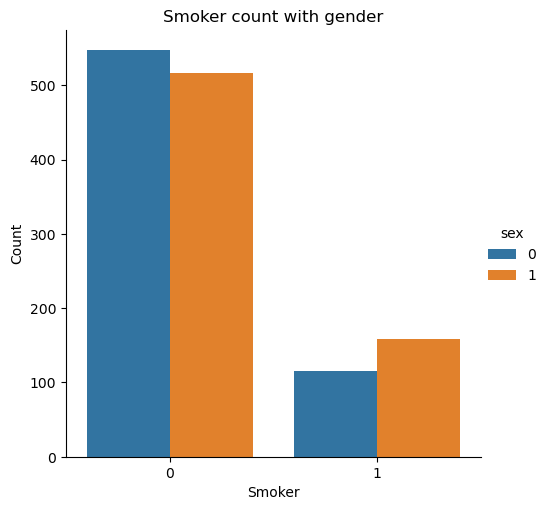

In [162]:
sns.catplot(x='smoker',kind ='count',hue='sex',data=df)
plt.title("Smoker count with gender")
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

We can notice more male smokers than female smokers. So i will assume that medical treatment expense for males would be more than females,given the impact of smoking on the medical expenses.

<Axes: xlabel='sex', ylabel='charges'>

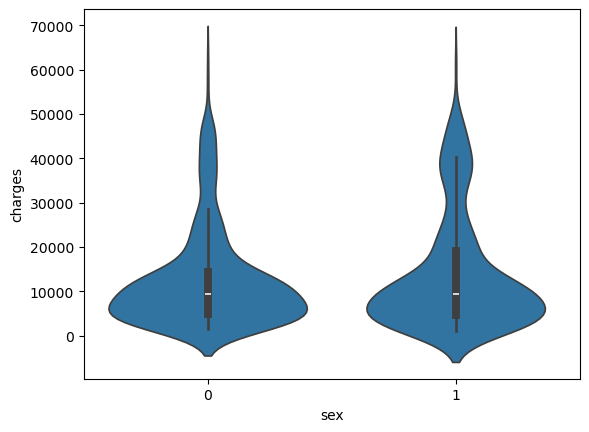

In [169]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

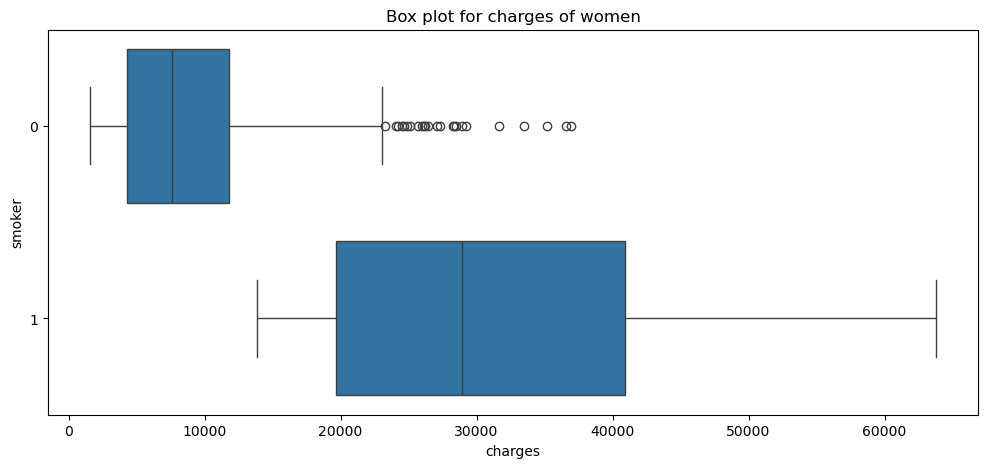

In [173]:
plt.figure(figsize =(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y= 'smoker',x='charges',data=df[(df.sex==0)],orient='h')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

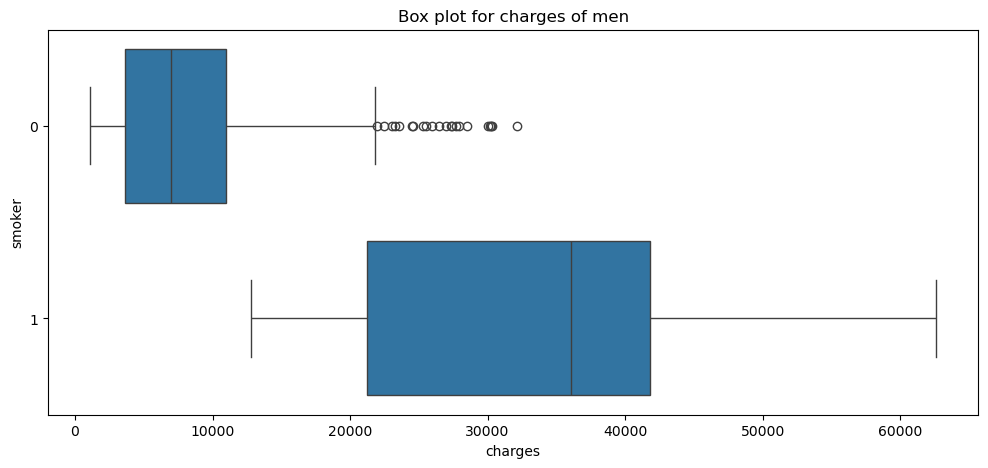

In [175]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker",x="charges",data=df[(df.sex==1)] ,orient="h")

The assumption is true,that the medical expense of males is greater than that of females. In addition to that medical expense of smokers is greater than that of non-smokers.

Smokers and Age Distribution

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


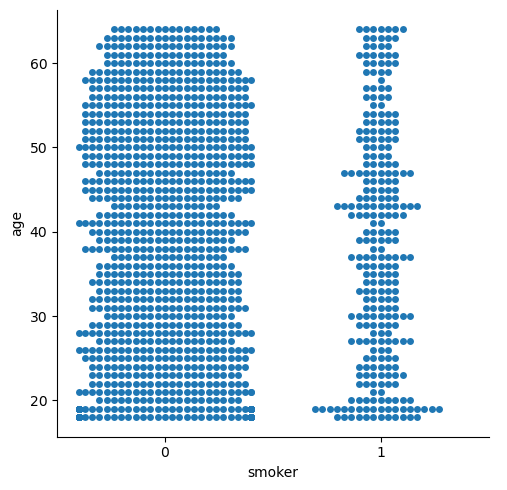

In [179]:
#smokers and age distribution
sns.catplot(x='smoker',y='age',kind='swarm',data=df)

From the graph, we can see that there significant number of smokers of age 19. Now i will study the medical expense of smokers of age 19.

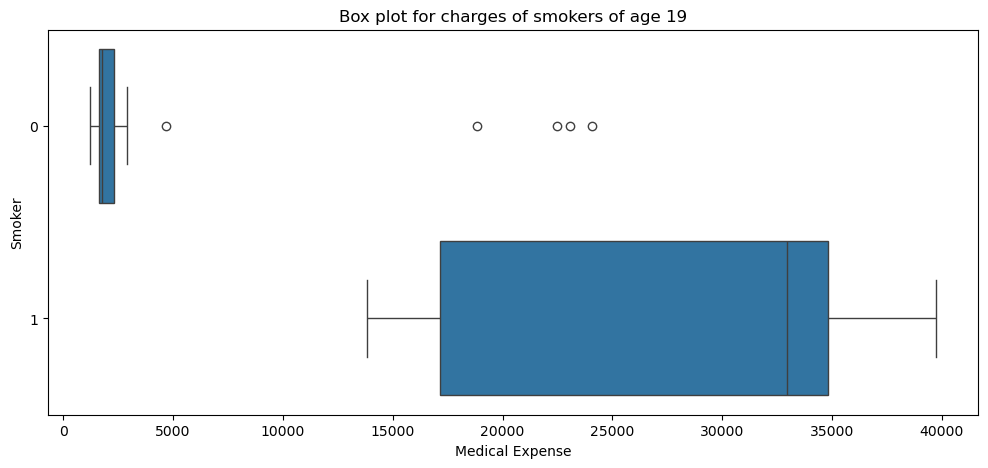

In [182]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker",x ="charges",data=df[(df.age ==19)],orient ="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non smokers.In non smokers we can see some outliers ,which may be due to illness or accidents.

it is clear that the medical expense of smokers is higher than that of non-smokers.Now i will plot the charge distribution with respect to patients age of smokers and non-smokers.

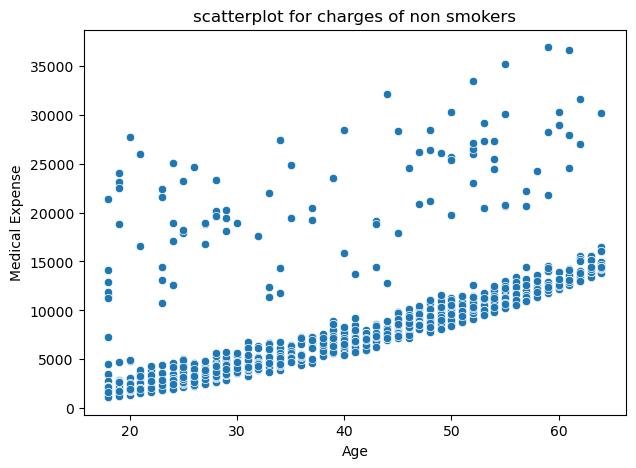

In [188]:
#Non smoker charge Distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age",y="charges",data =df[(df.smoker ==0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness.But there are some outliers which shows that there are other illness or acciecents which my increse the medical expense

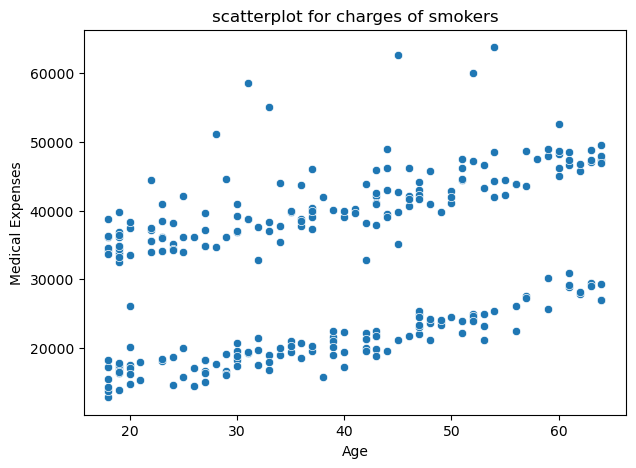

In [191]:
#smokers charge Distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age",y="charges",data=df[(df.smoker==1)])
plt.xlabel("Age")
plt.ylabel("Medical Expenses")
plt.show()


Here we see pecularity in the graph. In the graph there are two segments, one with high medical expenses which may due to smoking related illness and other the other low medical expense which may be due to age related illness.

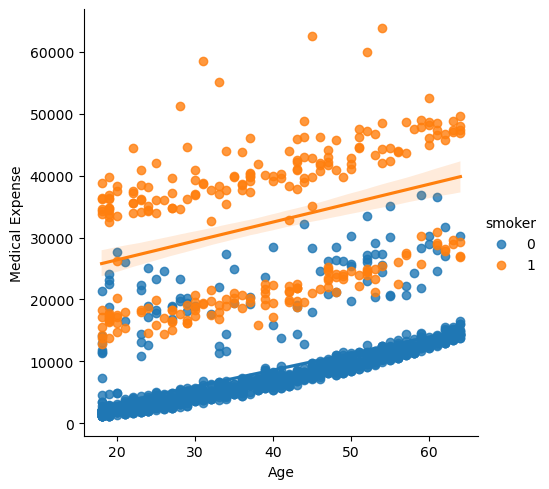

In [196]:
#Age charges distribution
sns.lmplot(x="age",y="charges",data=df,hue ='smoker')
plt.xlabel("Age")
plt.ylabel("Medical Expense")
plt.show()



Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers. In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.


Charges distribution for patients with BMI greater than 30 i.e obese patients

C:\Users\HP\AppData\Local\Temp\ipykernel_1388\836969744.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'])


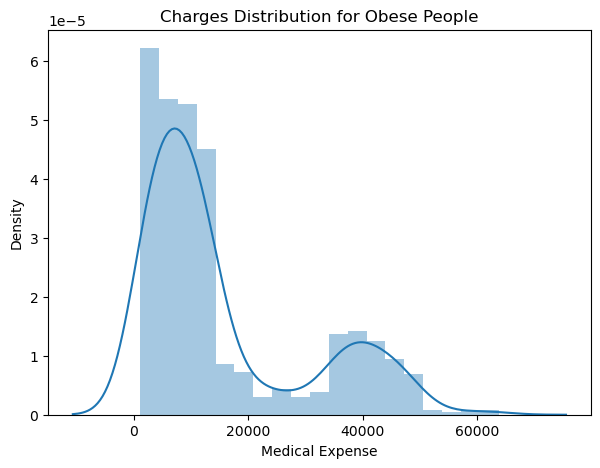

In [202]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1388\3107680277.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi<30)]['charges'])


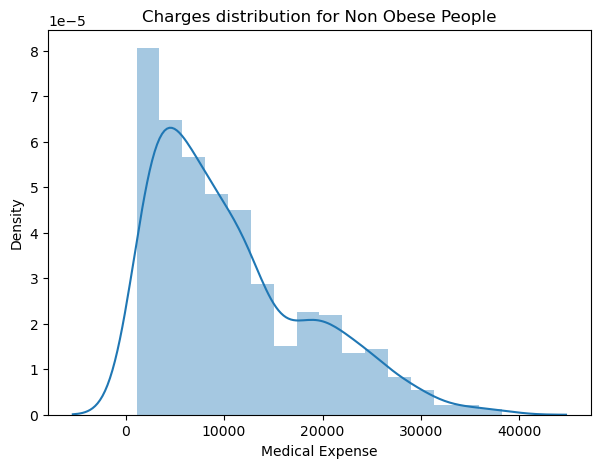

In [208]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi<30)]['charges'])
plt.title("Charges distribution for Non Obese People")
plt.xlabel("Medical Expense")
plt.show()



Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.
Through the EDA, we have a clear understanding about the data and the correlation between the variables. Now, I will build a model to predict the medical expense of patients.

Train Test split

In [230]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

Model Building

In [235]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr

LinearRegression()

In [237]:
#model Training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430945

In [239]:
y_pred =lr.predict(x_test)

Polynominal Regression

In [248]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg =PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [250]:
#transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.2, random_state=0)

In [252]:
plr = LinearRegression()
#model training
plr.fit(x_train,y_train)
#model accuracy
plr.score(x_train,y_train)

0.8372892318154602

In [254]:
#model prediction
y_pred = plr.predict(x_test)

Decision Tree Regressor

In [257]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [259]:
#model training
dtree.fit(x_train,y_train)
#model accuracy
dtree.score(x_train,y_train)

0.9993688476658964

In [261]:
#model prediction
dtree_pred = dtree.predict(x_test)

In [263]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [267]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.975029074238818

In [269]:
#model prediction
rf_pred = rf.predict(x_test)

Model Evaluation

In [274]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Linear Regression

C:\Users\HP\AppData\Local\Temp\ipykernel_1388\767213784.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\HP\AppData\Local\Temp\ipykernel_1388\767213784.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred

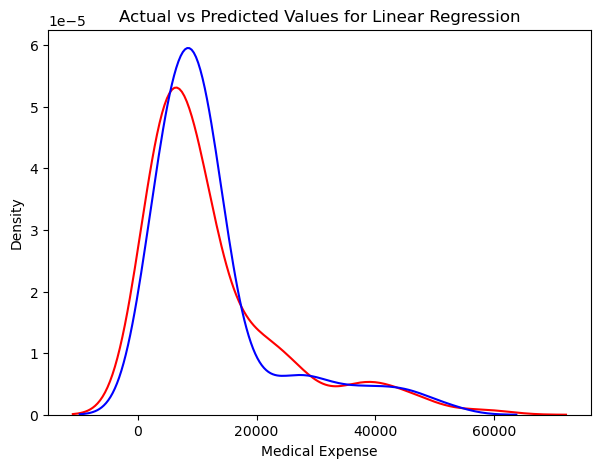

In [277]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [279]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 2988.6210423247667
MSE: 24512839.635914266
RMSE: 4951.044297510805
R2 Score: 0.8221476642789292


Polynomial Regression

C:\Users\HP\AppData\Local\Temp\ipykernel_1388\1377664896.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\HP\AppData\Local\Temp\ipykernel_1388\1377664896.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pr

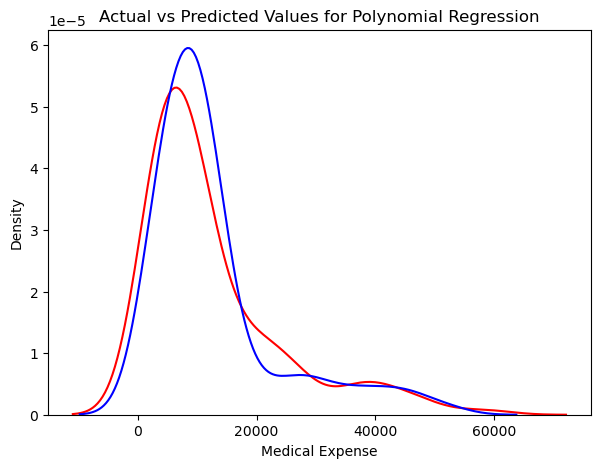

In [284]:
#acutal vs predicted values for polynomial regression
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

In [286]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 2988.6210423247667
MSE: 24512839.635914266
RMSE: 4951.044297510805
R2 Score: 0.8221476642789292


Decision Tree Regressor

C:\Users\HP\AppData\Local\Temp\ipykernel_1388\1470506590.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_1388\1470506590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt

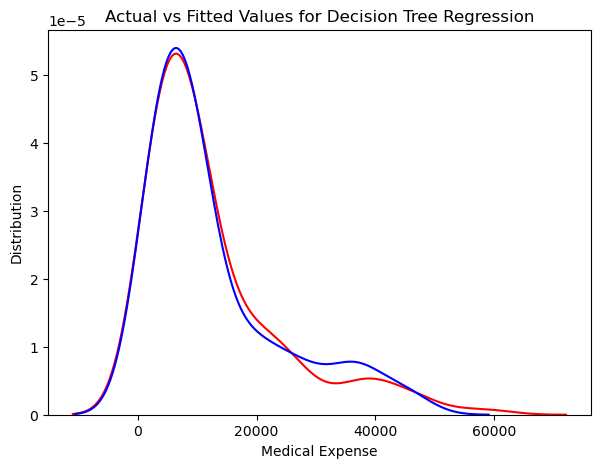

In [291]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [293]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))

MAE: 3279.1309340186917
MSE: 48221889.708208054
RMSE: 6944.198276850111
Accuracy: 0.6501272049720734


Random Forest Regressor

C:\Users\HP\AppData\Local\Temp\ipykernel_1388\4145278179.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_1388\4145278179.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf

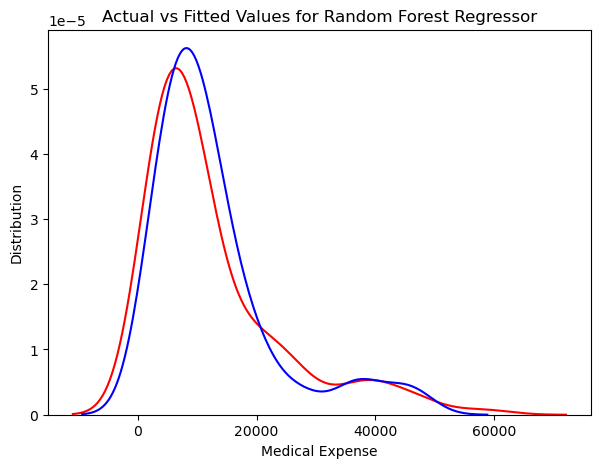

In [298]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [300]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2853.2332447903823
MSE: 26410992.033038035
RMSE: 5139.1625809112165
Accuracy: 0.8083756638743576
